In [90]:
import pandas as pd

In [91]:
titanic_data = pd.read_csv('data/titanic_data.csv')

In [92]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
sns.set()

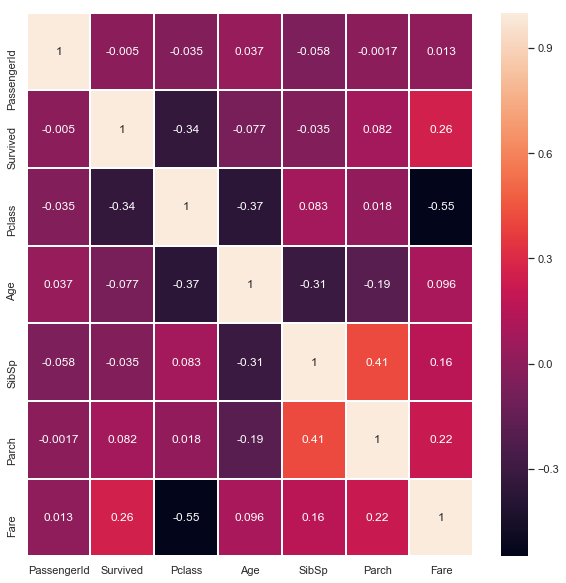

In [95]:
plt.figure(figsize=(10, 10))
sns.heatmap(titanic_data.corr(), annot=True, linecolor='w', linewidths=1)

In [96]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [97]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [98]:
def gender_converter(x):
    if x=='male':
        return 0
    else: 
        return 1

In [99]:
titanic_data['Sex'] = titanic_data['Sex'].apply(gender_converter)

In [100]:
titanic_data['Sex'].head(2)

0    0
1    1
Name: Sex, dtype: int64

In [101]:
titanic_data['Sex'].isnull().any()

False

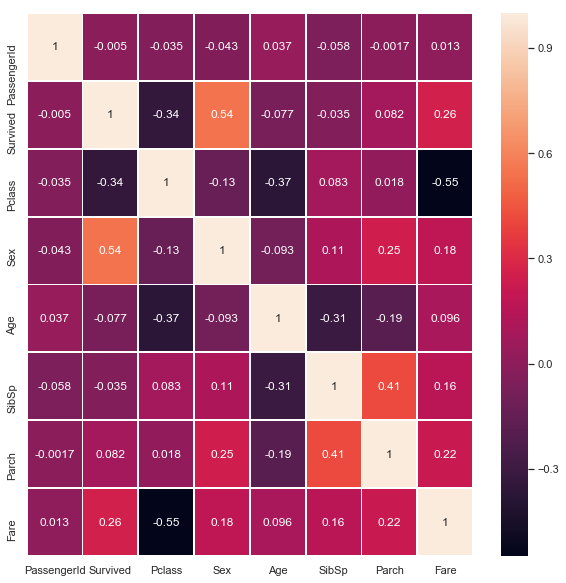

In [102]:
plt.figure(figsize=(10, 10))
sns.heatmap(titanic_data.corr(), annot=True, linecolor='w', linewidths=1)

In [103]:
training_data = titanic_data[['PassengerId', 'Pclass', 'Sex', 'Fare']]

In [104]:
output_data = titanic_data['Survived']

In [105]:
training_data.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Fare           False
dtype: bool

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X, x_test, Y, y_test = train_test_split(training_data, output_data, test_size= 0.3, random_state = 5)

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
logistic_model = LogisticRegression()

In [110]:
logistic_model.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [111]:
logistic_predictions = logistic_model.predict(x_test)

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [113]:
logistic_score = accuracy_score(logistic_predictions, y_test)

In [114]:
logistic_score

0.7947761194029851

## Making predictions on test data

In [115]:
test_data = pd.read_csv('test.csv')

In [116]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [117]:
test_data['Sex'] = test_data['Sex'].apply(gender_converter)

In [118]:
test_data = test_data[['PassengerId', 'Pclass', 'Sex', 'Fare']]

In [119]:
test_data.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Fare            True
dtype: bool

In [120]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [121]:
test_data.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Fare           False
dtype: bool

In [122]:
logistic_test_predictions = logistic_model.predict(test_data)

In [123]:
logistic_submission = {
    'PassengerId': test_data['PassengerId'],
    'Survived': logistic_test_predictions
}

In [124]:
logistic_test_predictions = pd.DataFrame(data = logistic_submission)

In [125]:
logistic_test_predictions.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [126]:
logistic_test_predictions.to_csv('Logistic_model_predicitons.csv')

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [129]:
knn_model.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [130]:
knn_predictions = knn_model.predict(x_test)

In [131]:
knn_score = accuracy_score(y_test, knn_predictions)

In [132]:
knn_score

0.6007462686567164

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
decision_model = DecisionTreeClassifier()

In [135]:
decision_model.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [136]:
decision_predictions = decision_model.predict(x_test)

In [137]:
decision_score = accuracy_score(y_test, decision_predictions)

In [138]:
decision_score

0.75

In [139]:
from sklearn.svm import SVC

In [140]:
svm_model = SVC()

In [141]:
svm_model.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [142]:
svm_predictions = svm_model.predict(x_test)

In [143]:
svm_accuracy = accuracy_score(y_test, svm_predictions)

In [144]:
svm_accuracy

0.5970149253731343

In [145]:
from sklearn.ensemble import VotingClassifier

In [160]:
vc_logistic = LogisticRegression()
vc_decision = DecisionTreeClassifier()

In [161]:
voting_model = VotingClassifier(estimators=[('logistic', vc_logistic),
                                           ('decision', vc_decision)], 
                                voting='hard')

In [162]:
voting_model.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('decisio...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [163]:
voting_predictions = voting_model.predict(x_test)

In [164]:
voting_accuracy = accuracy_score(y_test, voting_predictions)

In [165]:
voting_accuracy

0.8246268656716418

In [170]:
model_name = []
model_prediction = {}
model_accuracy = []

In [171]:
model_prediction['Logistic'] = logistic_predictions

In [172]:
model_prediction['Decision'] = decision_predictions

In [173]:
model_prediction['Ensemble'] = voting_predictions

In [174]:
model_prediction = pd.DataFrame(model_prediction)

In [175]:
model_prediction.head(3)

,Logistic,Decision,Ensemble
0,0,1,0
1,0,0,0
2,0,0,0


In [179]:
len(voting_predictions)

268

In [180]:
voting_test_predictions = voting_model.predict(test_data)

In [181]:
voting_submission = {
    'PassengerId': test_data['PassengerId'],
    'Survived' : voting_test_predictions 
}

In [182]:
voting_submission = pd.DataFrame(data = voting_submission)

In [183]:
voting_submission.to_csv('VotingClassifier_submission.csv')